In [1]:
from IPython.display import display, Math

In [2]:
# As seguintes librarias serão necessárias para resolver os exercícios
import numpy as np # O numpy permite efetuar cálculos de forma eficiente
                   # sobre vários números (arrays)
import matplotlib.pyplot as plt # O matplotlib e o seu módulo pyplot oferecem
                                # uma interface simples para gerar gráficos

# Exercício 1

Um corpo de massa 1 kg move-se num oscilador quártico forçado. Se a posição de equilíbrio for a origem do
eixo $x_\text{eq} = 0 \; \text{m}$, o oscilador quártico tem a energia potencial

$$
E_p = \frac{1}{2} k x^2 \left( 1 + \alpha x^2 \right)
$$

e exerce no corpo a força

$$
F_x = -k x \left( 1 + 2 \alpha x^2 \right)
$$

O oscilador é amortecido pela força $-b v_x$ e sujeito à força externa $F_0 \cos \left( \omega_f t \right)$.

Considere $k = 1 \; \text{N/m}$, $b = 0.05 \; \text{kg/s}$, $\alpha = 0.002 \; \text{N/m}^2$, $F_0 = 7.5 \; \text{N}$ e $\omega_f = 1.0 \; \text{rad/s}$

In [3]:
# Dados
k = 1
m = 1
b = 0.05
F_0 = 7.5
omega_f = 1.0
alpha = 0.002

## Alínea A

Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 3 m. Tem confiança no seu resultado?

Utilizamos o método de Euler-Cromer para calcular numericamente a lei do movimento através da fórmula da força que nos é dada.

Como ao longo do exercício vai ser necessário fazer várias vezes este cálculo mas com valores iniciais diferentes, vamos mover o código do método de Euler-Cromer para uma função `movimento`. 

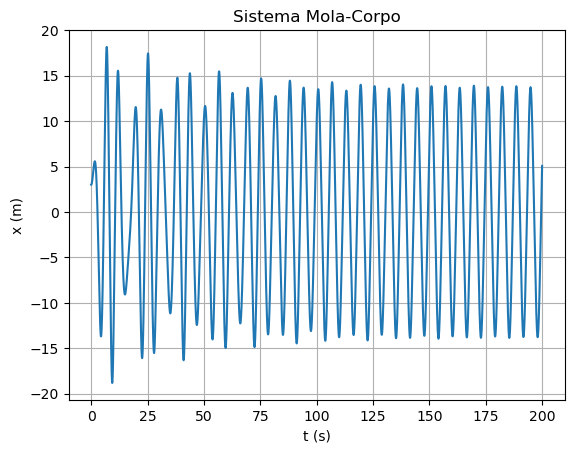

In [4]:
def movimento(*, dt):
    x0 = 3
    v0 = 0
    t0 = 0
    tf = 200

    # Número de passos/iterações
    #
    # + 0.1 para garantir que não há arrendodamentos
    # para baixo
    n = int((tf-t0) / dt + 0.1)

    t = np.zeros(n + 1) # Tempo
    x = np.zeros(n + 1) # Posição
    v = np.zeros(n + 1) # Velocidade
    a = np.zeros(n + 1) # Aceleração

    # Valores inicias
    v[0] = v0
    t[0] = t0
    x[0] = x0

    for i in range(n):
      a_oscilador = -k/m*x[i]*(1 + 2 * alpha * x[i]**2)
      a_amortecimento = - (b/m)*v[i]
      a_forcado = (F_0/m)*np.cos(omega_f * t[i])
      a[i] = a_oscilador + a_amortecimento + a_forcado
      v[i + 1] = v[i] + a[i] * dt
      x[i + 1] = x[i] + v[i + 1] * dt 
      t[i + 1] = t[i] + dt
    
    return t, x

dt = 0.001
t, x = movimento(dt=dt)

plt.plot(t, x)
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.grid()
plt.show()

Para termos confiança no resultado, voltamos a fazer o cálculo numérico mas com um passo temporal diferente, se os dois resultados convergirem podemos ter confiança no resultado.

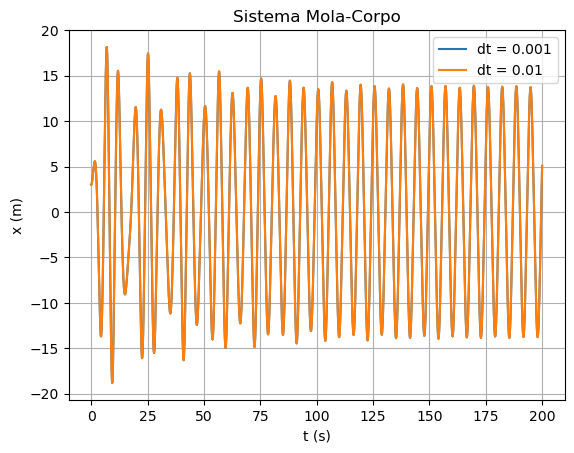

In [5]:
plt.plot(t, x, label="dt = 0.001")
t_01, x_01 = movimento(dt=0.01)
plt.plot(t_01, x_01, label="dt = 0.01")
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.legend()
plt.grid()
plt.show()

## Alínea B

Calcule a amplitude do movimento e o seu período no regime estacionário, usando os resultados numéricos.

Começamos por identificar a região do gráfico onde o oscilador se encontra em regime estacionário. Fazemos isto olhando para o gráfico e encontrando a região onde o período e a amplitude da oscilação se tornam constantes.

No caso deste gráfico isto acontece mais ou menos após o instante $t = 150 \; \text{s}$.

De seguida utilizamos a interpolação para calcular extremos para obter a amplitude e o período.

In [6]:
def interpolate_extremum(x0, y0, x1, y1, x2, y2):
    """Calculates a maximum or minimum (extremum) using Lagrange's polynomial
    
    Parameters
    ----------
    x0, y0 : float
        Coordinates of the first point to sample from
    x1, y1 : float
        Coordinates of the second point to sample from
    x2, y2 : float
        Coordinates of the third point to sample from
    
    Returns
    ----------
    xm: float
        The coordinate of the extremum
    ym: float
        The extremum
    """
    xab = x0-x1
    xac = x0-x2
    xbc = x1-x2
    
    a = y0/(xab*xac)
    b = -y1/(xab*xbc)
    c = y2/(xac*xbc)
    
    xmla = (b+c)*x0+(a+c)*x1+(a+b)*x2
    xm = xmla/(2*(a+b+c))
    
    xta = xm-x0
    xtb = xm-x1
    xtc = xm-x2
    
    ymax = a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xm, ymax

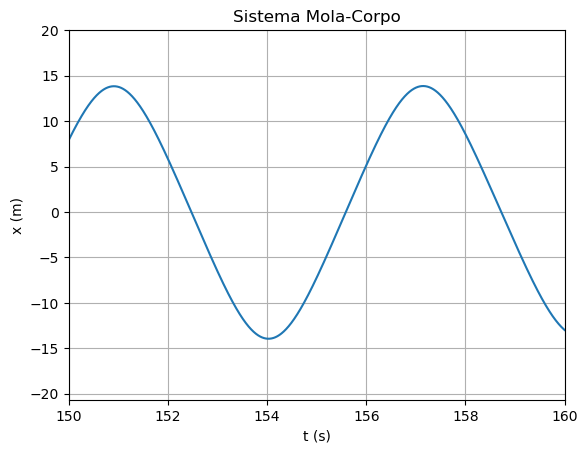

In [7]:
plt.plot(t, x)
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.xlim([150, 160])
plt.grid()
plt.show()

In [8]:
def get_value(t, x):
    targetIdx = int(np.ceil(t / dt))
    return x[targetIdx]
    
t_max, x_max = interpolate_extremum(
    150, get_value(150, x),
    151, get_value(151, x),
    152, get_value(152, x),
)
t_min, x_min = interpolate_extremum(
    153.5, get_value(153.5, x),
    154, get_value(154, x),
    154.5, get_value(154.5, x),
)

A = (x_max - x_min)/2

In [9]:
display(Math(r'A = {:.3f} \; \text{{m}}'.format(A)))

<IPython.core.display.Math object>

In [10]:
t_max2, x_max2 = interpolate_extremum(
    156, get_value(156, x),
    157, get_value(157, x),
    158, get_value(158, x),
)

T = t_max2 - t_max

In [11]:
display(Math(r'T = {:.3f} \; \text{{s}}'.format(T)))

<IPython.core.display.Math object>

## Alínea C

Calcule os coeficientes de Fourier da oscilação no regime estacionário.

A seguinte função permite calcular **um** coeficiente de fourier a partir das séries do tempo e posição, além disso é necessário passar os os indicies para onde começar e acabar a análise de fourier.

In [12]:
def abfourier(tp, xp, it0, it1, nf):
    """Computes the fourier series coefficients.
    
    The fourier series coefficients are defined by the following integrals:
    
                  tp(it1)
          2      ⌠
    a   = ─ ⋅    ⌡    xp ⋅ cos(nf ⋅ w) ⋅ dx
     nf   T   tp(it0)
     
                  tp(it1)
          2      ⌠
    b   = ─ ⋅    ⌡    xp ⋅ sin(nf ⋅ w) ⋅ dx
     nf   T   tp(it0)

    This functions operates over a discrete domain, so the integral is replaced
    with a finite summation and the trapezoidal rule to approximate the integral.
    
    Parameters
    ----------
    tp : np.NDArray
        The time series
    xp : np.NDArray
        The position series
    it0 : int
        The index where the analysis start
    it1 : int
        The index where the analysis ends
    nf : int
        The number of the coefficient to compute
    
    Returns
    ----------
    a_f, b_f : float
        The fourier series coefficients
    """
    dt = tp[1] - tp[0] # Time step
    per = tp[it1] - tp[it0] # Period
    ome = 2*np.pi / per # Angular Frequency
    
    s1 = xp[it0] * np.cos(nf*ome*tp[it0])
    s2 = xp[it1] * np.cos(nf*ome*tp[it1])
    st = xp[it0+1:it1] * np.cos(nf*ome*tp[it0+1:it1])
    soma = np.sum(st)
    
    intega = ((s1 + s2)/2 + soma)*dt
    af = 2/per * intega
    
    q1 = xp[it0] * np.sin(nf*ome*tp[it0])
    q2 = xp[it1] * np.sin(nf*ome*tp[it1])
    qt = xp[it0+1:it1] * np.sin(nf*ome*tp[it0+1:it1])
    somq = np.sum(qt)
    
    integq = ((q1 + q2)/2 + somq)*dt
    bf = 2/per * integq
    return af, bf

Nós queremos fazer a análise de fourier de uma oscilação, por isso precisamos de calcular os índices de dois máximos consecutivos. Isto é feito através do cálculo do pontos de infleção, onde os máximos serão menor que 0.

Além disso temos que procurar os pontos de inflexão apenas no regime estacionário, pois é lá que queremos calcular os coeficientes.

In [13]:
targetIdx = int(np.ceil(150 / dt))

inflection = np.diff(np.sign(np.diff(x[targetIdx:])))
peaks = (inflection < 0).nonzero()[0] + 1

it0 = peaks[-2] + targetIdx
it1 = peaks[-1] + targetIdx

De seguida calculamos alguns coeficientes, neste caso 14.

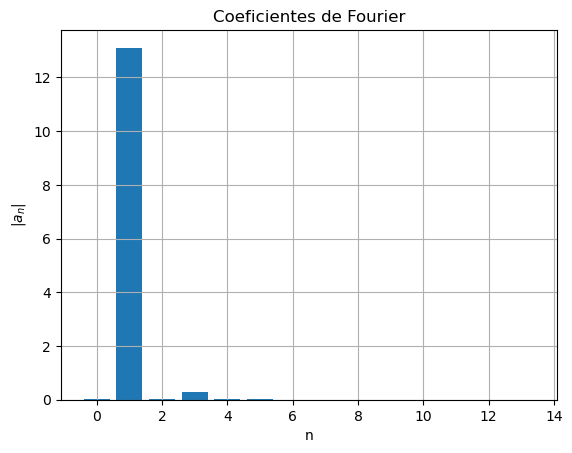

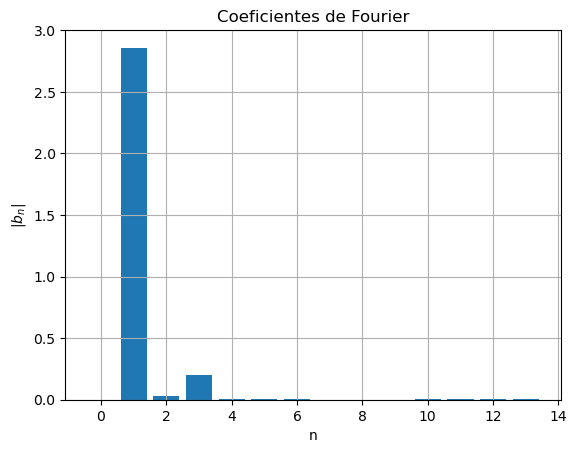

In [14]:
N = 14

coeffs = [abfourier(t, x, it0, it1, n) for n in range(N)]

ii = np.arange(N)
plt.figure()
plt.bar(ii, [np.abs(coeff[0]) for coeff in coeffs])
plt.xlabel("n")
plt.ylabel("$|a_n|$")
plt.title("Coeficientes de Fourier")
plt.grid()
plt.show()

plt.figure()
plt.bar(ii, [np.abs(coeff[1]) for coeff in coeffs])
plt.xlabel("n")
plt.ylabel("$|b_n|$")
plt.title("Coeficientes de Fourier")
plt.grid()
plt.show()

# Exercício 2

Um corpo de massa 1 kg move-se num oscilador quártico forçado. Se a posição de equilíbrio for a origem do
eixo $x_\text{eq} = 0 \; \text{m}$, o oscilador quártico tem a energia potencial

$$
E_p = \alpha x^4
$$

e exerce no corpo a força

$$
F_x = -4 \alpha x^3
$$

O oscilador é amortecido pela força $-b v_x$ e sujeito à força externa $F_0 \cos \left( \omega_f t \right)$.

Considere $k = 1 \; \text{N/m}$, $b = 0.05 \; \text{kg/s}$, $\alpha = 0.25 \; \text{N/m}^2$, $F_0 = 7.5 \; \text{N}$ e $\omega_f = 1.0 \; \text{rad/s}$.

In [15]:
# Dados
k = 1
m = 1
b = 0.05
F_0 = 7.5
omega_f = 1.0
alpha = 0.25

## Alínea A

Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 3 m.

Como estamos a tratar de um oscilador não harmónico, temos que usar o método de Runge-Kutta, caso contrário os resultados do cálculo númerico não vão convergir.

In [16]:
def runge_kutta_4(t, x, vx, acelera, dt):
    """Numerical integration for a second order derivative in respect
    to the motion.
    
    Parameters
    ----------
    t : float
        Current time instant
    x : float
        Current position of the body
    vx : float
        Current velocity of the body
    acceleration : Callable[[float, float, float], float]
        The acceleration in function of the time, position and velocity (in that order)
    dt : float
        The time step to use in the integration
    
    Returns
    ----------
    xp : float
        The next position
    vxp : float
        The next velocity
    """
    ax1=acelera(t,x,vx)
    c1v=ax1*dt
    c1x=vx*dt
    
    ax2=acelera(t+dt/2.,x+c1x/2.,vx+c1v/2.)
    c2v=ax2*dt
    c2x=(vx+c1v/2.)*dt # predicto: vx(t+dt) * dt
    
    ax3=acelera(t+dt/2.,x+c2x/2.,vx+c2v/2.)
    c3v=ax3*dt
    c3x=(vx+c2v/2.)*dt
    
    ax4=acelera(t+dt,x+c3x,vx+c3v)
    c4v=ax4*dt
    c4x=(vx+c3v)*dt
    
    xp=x+(c1x+2.*c2x+2.*c3x+c4x)/6.
    vxp=vx+(c1v+2.*c2v+2.*c3v+c4v)/6.
    
    return xp, vxp

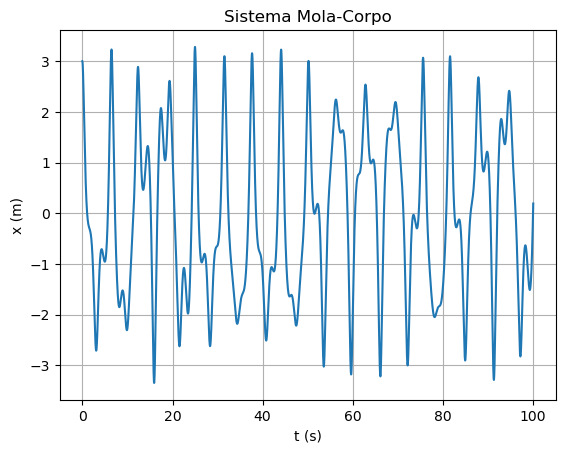

In [17]:
def movimento(*, x0, tf = 100):
    # Initial conditions
    v0 = 0
    # Parameters
    dt = 0.001
    t0 = 0

    accel = lambda t, x, v: -4 * alpha * x**3 - (b/m)*v + (F_0/m)*np.cos(omega_f * t)

    # Número de passos/iterações
    #
    # + 0.1 para garantir que não há arrendodamentos
    # para baixo
    n = int((tf-t0) / dt + 0.1)

    t = np.zeros(n + 1) # Tempo
    x = np.zeros(n + 1) # Posição
    v = np.zeros(n + 1) # Velocidade

    # Valores inicias
    v[0] = v0
    t[0] = t0
    x[0] = x0

    for i in range(n):
      mx, vx = runge_kutta_4(t[i], x[i], v[i], accel, dt)
      v[i + 1] = vx
      x[i + 1] = mx
      t[i + 1] = t[i] + dt
        
    return t, x, v

t, x, v = movimento(x0=3)

plt.plot(t, x)
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.grid()
plt.show()

## Alínea B

Calcule novamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 3.003 m. O que se observa?

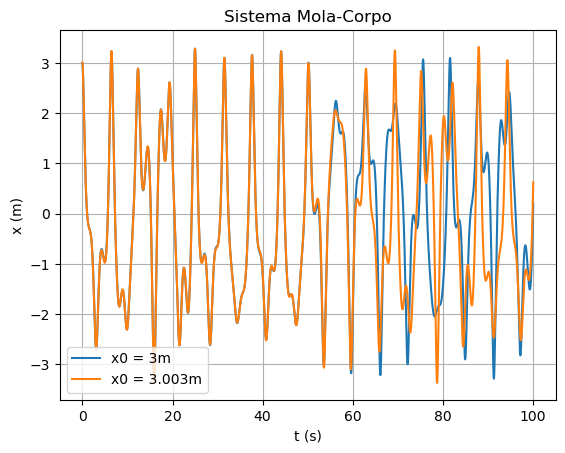

In [18]:
plt.plot(t, x, label="x0 = 3m")
t_3003, x_3003, v_3003 = movimento(x0=3.003)
plt.plot(t_3003, x_3003, label="x0 = 3.003m")
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.legend()
plt.grid()
plt.show()

Os resultados após um certo instante ($t \approx 50 \; \text{s}$) começam a divergir bastante ou seja o sistema apresenta-se caótico.

## Alínea C

Faça o plot da trajetória no espaço de fase (vx(t) vs x(t)) durante 100s, para os dois casos das alinhas a) e b).

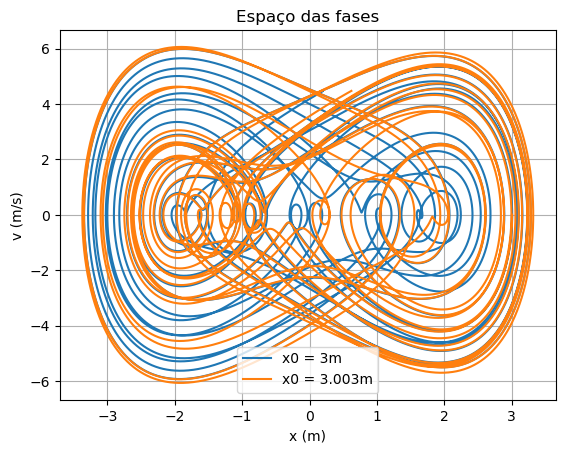

In [19]:
plt.plot(x, v, label="x0 = 3m")
plt.plot(x_3003, v_3003, label="x0 = 3.003m")
plt.xlabel("x (m)")
plt.ylabel("v (m/s)")
plt.title("Espaço das fases")
plt.legend()
plt.grid()
plt.show()

## Alínea D

Repite alinhas a)-c) usando $F_0 = 0.5 \; \text{N}$. O que se observa?

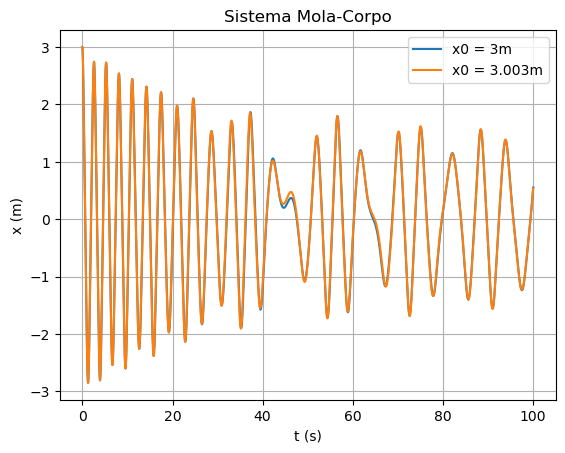

In [20]:
F_0 = 0.5
t, x, v = movimento(x0=3)

plt.plot(t, x, label="x0 = 3m")
t_3003, x_3003, v_3003 = movimento(x0=3.003)
plt.plot(t_3003, x_3003, label="x0 = 3.003m")
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.legend()
plt.grid()
plt.show()

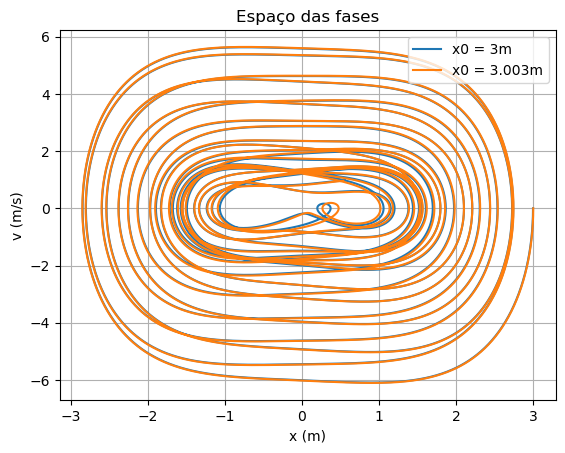

In [21]:
plt.plot(x, v, label="x0 = 3m")
plt.plot(x_3003, v_3003, label="x0 = 3.003m")
plt.xlabel("x (m)")
plt.ylabel("v (m/s)")
plt.title("Espaço das fases")
plt.legend()
plt.grid()
plt.show()

O movimento é menos caótico quando comparado ao movimento com $F_0 = 7.5 \; \text{N}$.